# IROP Project File

## Generalisation to Weighted Graph

The following produces illustrations for weighted graphs with the following rule:

Suppose the euclidian distance between two nodes is $d < R$ then the weight between the two nodes is given by $1-\frac{d}{R}$ for $R$ the radius defined in the full set of notes. 

In [24]:
import numpy as np


#Generates N nodes and returns an array of tuples of their position.
def N_node_gen(N):
    node_list = list()
    for _ in range(N):
        node_list.append(np.array((np.random.random(), np.random.random())))
    return node_list

test_nodes = N_node_gen(5)
test_nodes

[array([0.49293655, 0.62777177]),
 array([0.94253801, 0.14970866]),
 array([0.21491643, 0.49225404]),
 array([0.39126367, 0.02156134]),
 array([0.15384761, 0.22971522])]

In [25]:
import numpy as np

#Returns adjacency matrix of the generated graph

def adj_mat_gen(node_list, R):
    N = len(node_list)
    adj_mat = np.zeros((N, N), dtype=np.float64)
    for i in range(N):
        for j in range(i+1, N):
            dist = np.linalg.norm(node_list[i]-node_list[j])
            if dist < R:
                adj_mat[i, j] = 1 - dist/R
                adj_mat[j, i] = 1 - dist/R
    return adj_mat

test_adj_mat = adj_mat_gen(test_nodes, 0.5)

test_adj_mat

array([[0.        , 0.        , 0.3814202 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3814202 , 0.        , 0.        , 0.        , 0.46090434],
       [0.        , 0.        , 0.        , 0.        , 0.36851152],
       [0.        , 0.        , 0.46090434, 0.36851152, 0.        ]])

In [26]:
#Produces the matrix W(i)

def W_i_gen(i, adj_mat, gamma):
    i -= 1
    W_i = np.zeros(np.shape(adj_mat), dtype=np.float64)
    N = np.shape(adj_mat)[0]
    for j in range(N):
        if adj_mat[i, j]:
            val = adj_mat[i, j].item()
            W_i[j, j] = 1 - gamma * val
            W_i[j, i] = gamma * val
        else:
            W_i[j, j] = 1
    return W_i

test_W_1 = W_i_gen(1, test_adj_mat, 0.5)

test_W_1

array([[1.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 1.       , 0.       , 0.       , 0.       ],
       [0.1907101, 0.       , 0.8092899, 0.       , 0.       ],
       [0.       , 0.       , 0.       , 1.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 1.       ]])

In [27]:
#A single step of the simulation

def update_step(x, adj_mat, gamma):
    N = len(x)
    i = np.random.randint(N, size=1)
    W_i = W_i_gen(i, adj_mat, gamma)
    return np.matmul(W_i, x)

test_x = np.random.random(size=5)
update_step(test_x, test_adj_mat, 0.5)

array([0.46823338, 0.96327913, 0.4304415 , 0.80501569, 0.72981842])

In [28]:
import numpy as np

def simulate(x_0, adj_mat, gamma, time):
    x_list = [x_0]
    for t in range(1, time+1):
        x_list.append(update_step(x_list[-1], adj_mat, gamma))
    return np.array(x_list)

test_x = np.random.random(size=5)
test_simulation = simulate(test_x, test_adj_mat, 0.5, 10)
test_simulation

array([[0.80942615, 0.89470777, 0.11772673, 0.49630727, 0.04167848],
       [0.80942615, 0.89470777, 0.10020124, 0.4125393 , 0.04167848],
       [0.6741698 , 0.89470777, 0.10020124, 0.4125393 , 0.05516518],
       [0.6741698 , 0.89470777, 0.08982259, 0.34669106, 0.05516518],
       [0.6741698 , 0.89470777, 0.2012635 , 0.34669106, 0.05516518],
       [0.6741698 , 0.89470777, 0.29145151, 0.34669106, 0.05516518],
       [0.6741698 , 0.89470777, 0.29145151, 0.34669106, 0.1088805 ],
       [0.60118155, 0.89470777, 0.29145151, 0.34669106, 0.15095439],
       [0.60118155, 0.89470777, 0.35052016, 0.34669106, 0.15095439],
       [0.60118155, 0.89470777, 0.35052016, 0.34669106, 0.18702   ],
       [0.60118155, 0.89470777, 0.31284119, 0.31727074, 0.18702   ]])

In [29]:
N = 50
R = 2*np.sqrt(np.log(N)/N)
time = 1000
gamma = 0.5

node_list = N_node_gen(N)
adj_mat = adj_mat_gen(node_list, R)

x_0 = np.random.random(N)

In [30]:
#The following code investigates convergence in expectation to the initial value

simulate_num = 1000
desired_x = 1/N * np.sum(x_0) * np.ones(N)

x = np.zeros(N)
for _ in range(simulate_num):
    x += simulate(x_0, adj_mat, gamma, time = 100)[-1]
x /= simulate_num

print(np.linalg.norm(x - desired_x))

0.06305048832497012


In [35]:
#Convergence in expectation data generation

sim_num = 1000

desired_x = np.mean(x_0) * np.ones(N)

node_list = N_node_gen(N)
adj_mat = adj_mat_gen(node_list, R)

t_array = np.array([_ for _ in range(time+1)])
x_array = np.zeros((time+1, N))

for _ in range(sim_num):
    x_array += simulate(x_0, adj_mat, gamma, time)

x_array /= sim_num
x_array -= desired_x

plot_vals = np.linalg.norm(x_array, axis=1)

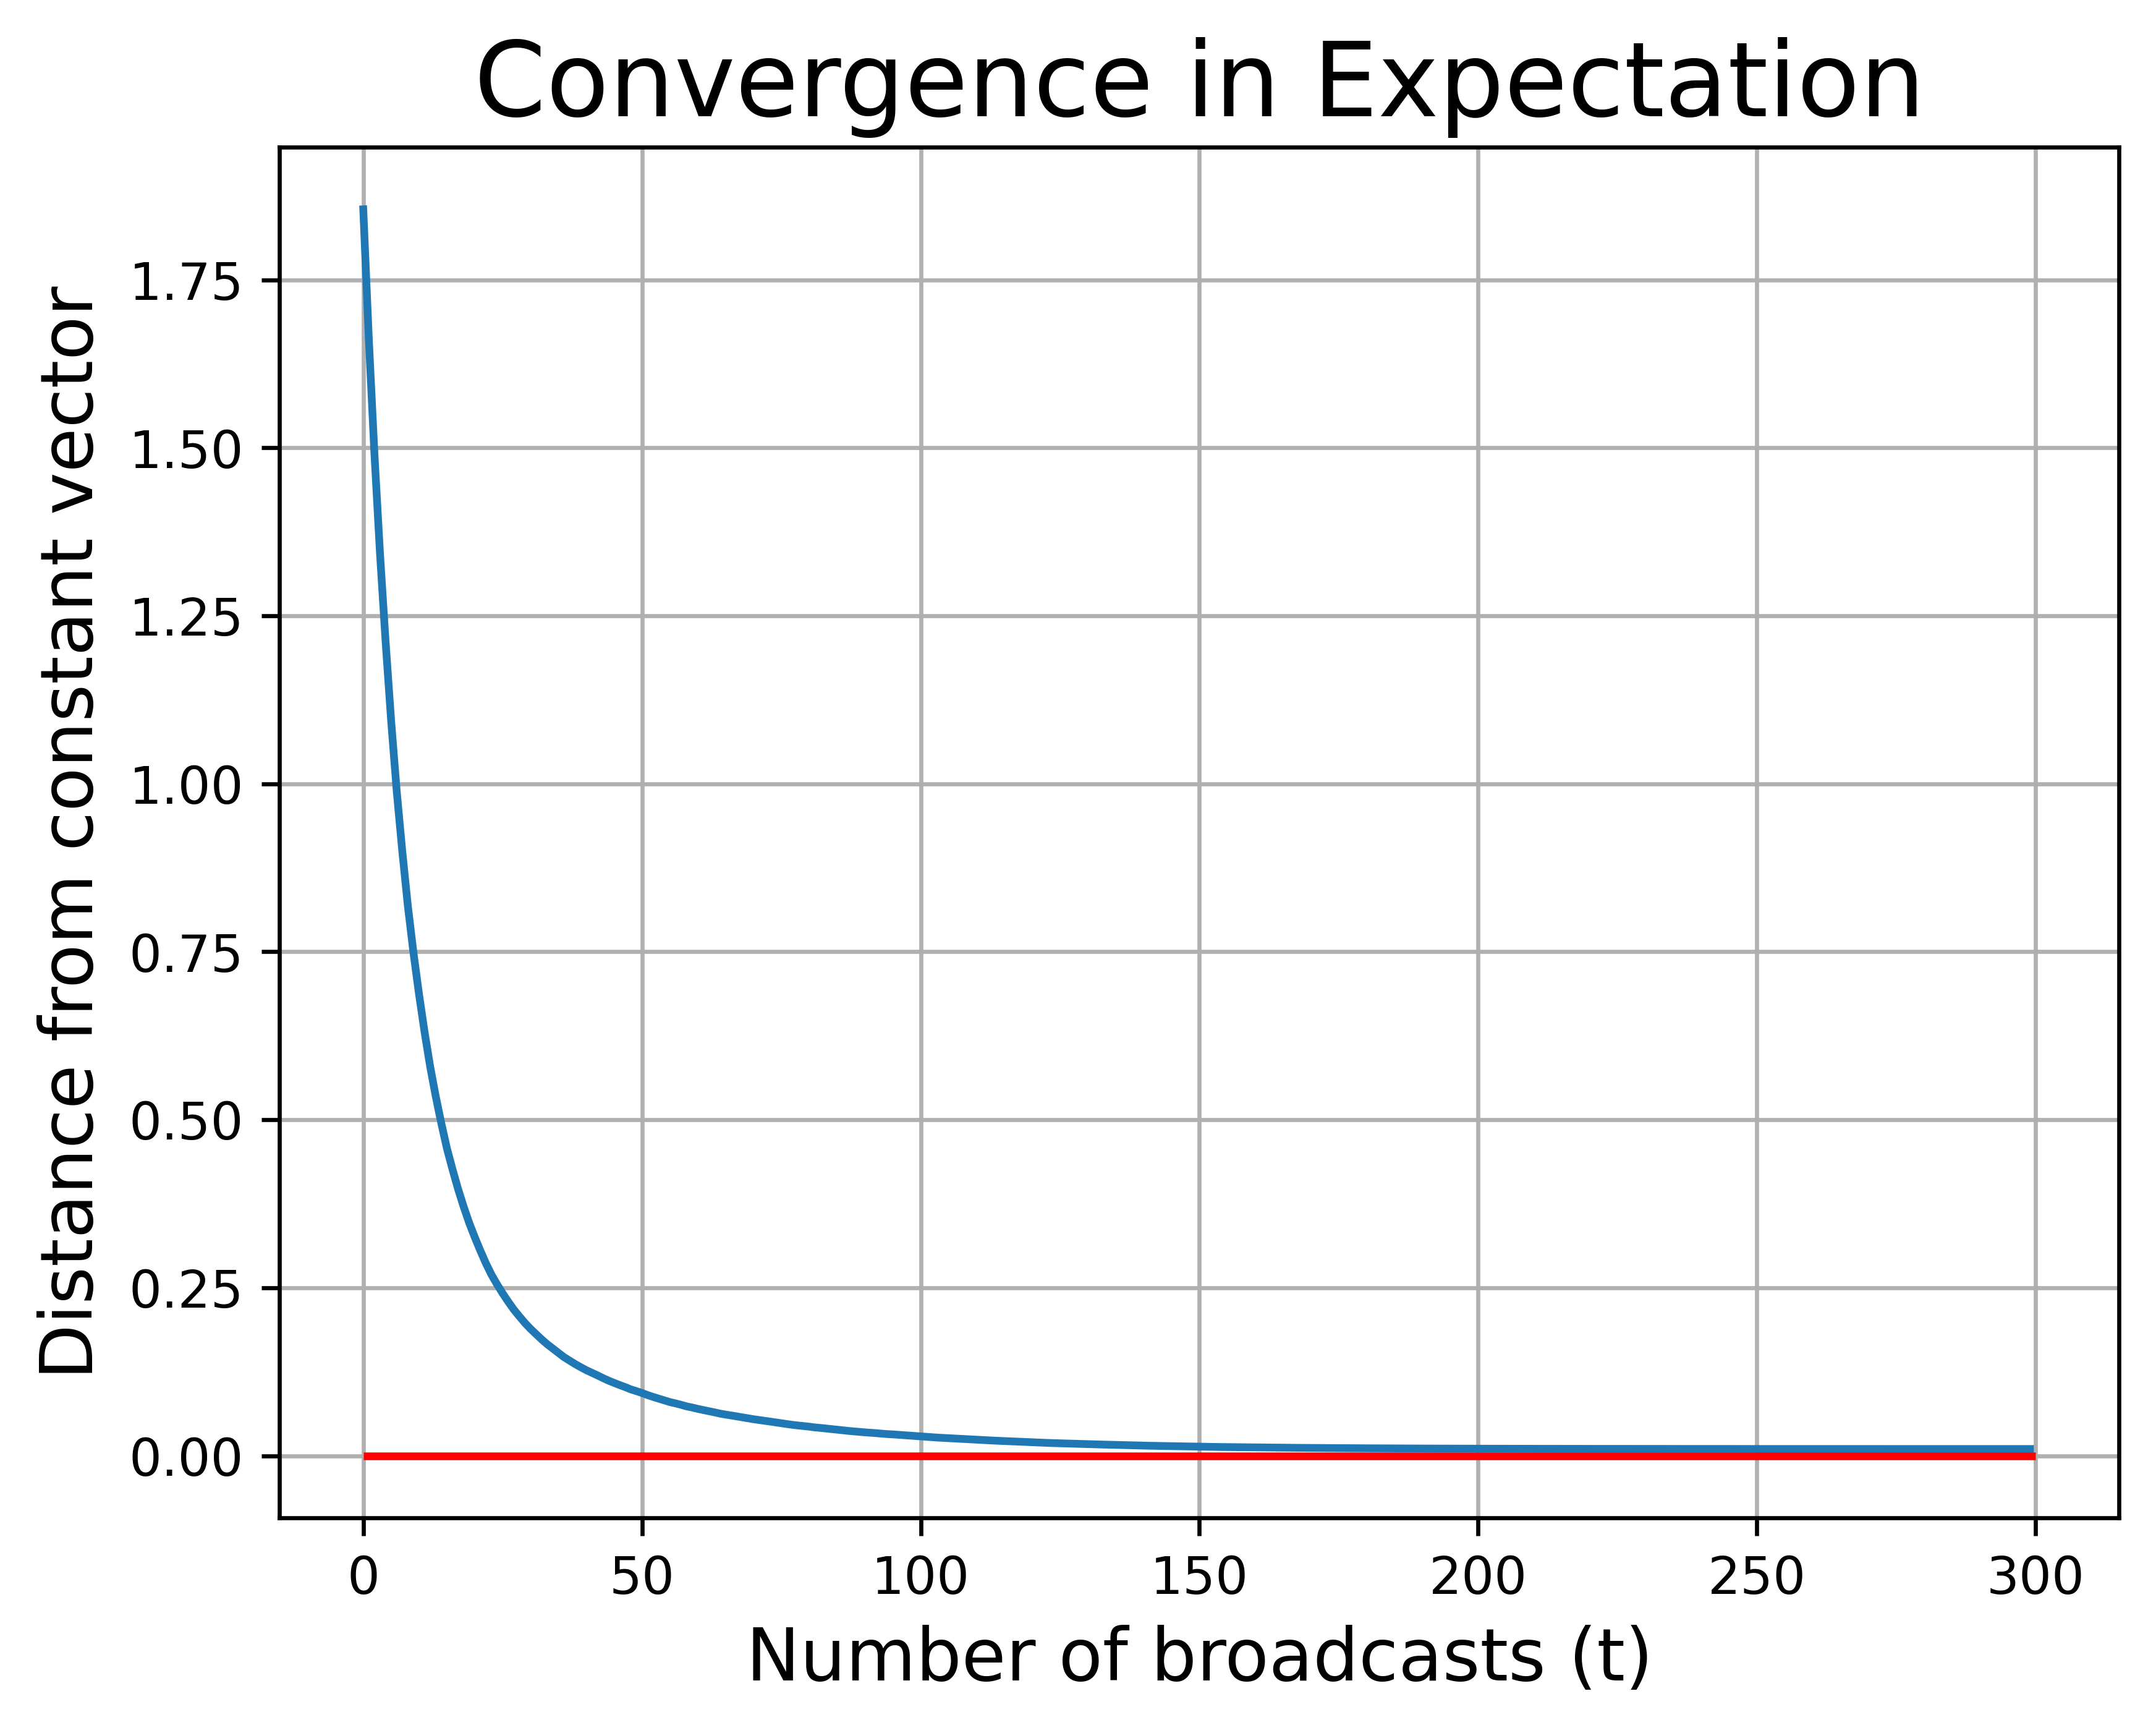

In [44]:
#Convergence in expectation plot

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(t_array[0:300], plot_vals[0:300])
ax.hlines(0, 0, 300, colors='r')
ax.grid(True)
ax.set_xlabel("Number of broadcasts (t)", fontsize=14)
ax.set_ylabel("Distance from constant vector", fontsize=14)
ax.set_title("Convergence in Expectation", fontsize=20)
fig.set_dpi(600)

In [11]:
#Convergence in second moment data generation

t = time
sim_num = 1000

x_0 = np.random.random(N)
beta_matrix = np.identity(N) - 1/N * np.ones((N, N))
t_array = np.array([_ for _ in range(t+1)])
beta_arr = np.zeros((t+1, N), dtype=np.float64)

for _ in range(sim_num):
    output = simulate(x_0, adj_mat, gamma, t)
    for i in range(t+1):
        beta_arr[i] += beta_matrix@output[i]

plot_vals_2 = np.linalg.norm(beta_arr, axis=1)
plot_vals_2 /= sim_num

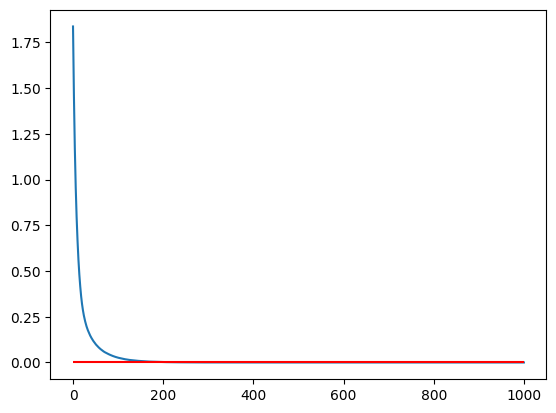

In [12]:
#Convergence in second moment plot

import matplotlib.pyplot as plt

plt.plot(t_array, plot_vals_2)
plt.hlines(0, 0, 1000, colors='r')

In [13]:
#Mean Square Error Data Generation

t = time
sim_num = 1000

x_0 = np.random.random(N)
J = np.ones([N, N])
x_expected = np.mean(x_0) * np.ones(N)
t_array = np.array([_ for _ in range(t+1)])
alpha_arr = np.zeros((t+1, N), dtype=np.float64)

for _ in range(sim_num):
    output = simulate(x_0, adj_mat, gamma, t)
    for i in range(t+1):
        alpha_arr[i] += output[i] - x_expected
    alpha_arr[-1]

plot_vals_3 = np.linalg.norm(alpha_arr, axis=1)
plot_vals_3 /= sim_num

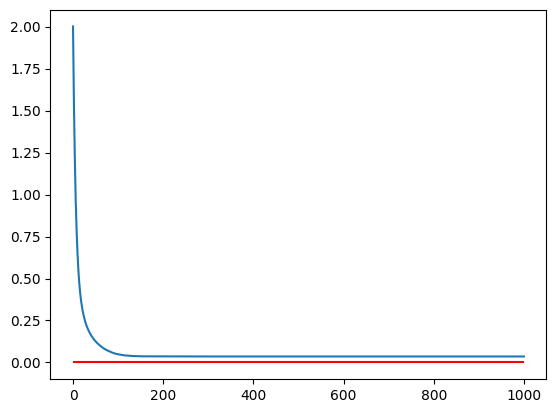

In [14]:
#Mean Square Error plot

import matplotlib.pyplot as plt

plt.plot(t_array, plot_vals_3)
plt.hlines(0, 0, 1000, colors='r')

In [15]:
import numpy as np

def simulate_cutoff_at_conv(x_0, adj_mat, gamma, eps=0.01, t_max = 5000):
    x_list = [x_0]
    t = 1
    N = len(x_0)
    while True:
        x_list.append(update_step(x_list[-1], adj_mat, gamma))
        if np.linalg.norm(x_list[-1] - np.mean(x_list[-1]) * np.ones(N))**2/N < eps or t >= t_max:
            break
        t += 1
    return np.array(x_list)

test_x = np.random.random(size=5)
test_simulation = simulate_cutoff_at_conv(test_x, test_adj_mat, 0.5)
test_simulation

array([[0.63118713, 0.69318785, 0.2456687 , 0.53234153, 0.53149428],
       [0.61991817, 0.69318785, 0.2456687 , 0.53213591, 0.53149428],
       [0.60992302, 0.69318785, 0.2456687 , 0.5319802 , 0.53149428],
       [0.60992302, 0.685915  , 0.26720076, 0.5319802 , 0.54035961],
       [0.60992302, 0.685915  , 0.26720076, 0.5319802 , 0.53832605],
       [0.60182993, 0.685915  , 0.26720076, 0.53352024, 0.53832605],
       [0.60182993, 0.67857051, 0.28698159, 0.53352024, 0.54550432],
       [0.59546307, 0.67857051, 0.28698159, 0.5364286 , 0.54550432],
       [0.58981589, 0.67857051, 0.28698159, 0.53863114, 0.54550432],
       [0.59756825, 0.67857051, 0.43519339, 0.53863114, 0.54550432]])

In [16]:
import numpy as np

def simulate_return_var(x_0, adj_mat, gamma, t):
    x_list = [x_0]
    N = len(x_0)
    for t in range(1, t+1):
        x_list.append(update_step(x_list[-1], adj_mat, gamma))
    return np.linalg.norm(x_list[-1] - np.mean(x_list[-1]) * np.ones(N))**2/N

test_x = np.random.random(size=5)
test_simulation = simulate_return_var(test_x, test_adj_mat, 0.5, 5)
test_simulation

np.float64(0.022297439273968992)

In [17]:
t_array = np.arange(50, 5000, 50, dtype=np.int64)
var_array = np.zeros(t_array.shape, dtype=np.float64)

for i in range(len(var_array)):
    var_array[i] = simulate_return_var(x_0, adj_mat, gamma, t_array[i])

var_array

array([3.48479502e-04, 2.68287005e-04, 6.19572807e-06, 2.37200803e-06,
       3.47724870e-09, 9.18976721e-09, 4.62390007e-11, 1.17356090e-12,
       1.95667201e-13, 3.22866445e-15, 3.39379660e-15, 1.00087773e-16,
       8.71797963e-17, 6.64717280e-17, 3.84648662e-20, 1.68381609e-19,
       1.02793213e-22, 6.18351290e-20, 8.61163020e-22, 9.02534292e-23,
       5.80959202e-28, 9.26269902e-25, 2.92963219e-30, 1.12770378e-28,
       2.02029743e-29, 7.01691775e-30, 2.12622666e-32, 3.21707338e-31,
       3.99360833e-32, 9.86076132e-33, 1.20794326e-32, 1.52841800e-32,
       1.57772181e-32, 4.49897235e-33, 1.41748444e-32, 1.40515849e-32,
       1.38050658e-32, 1.09084672e-32, 4.68386162e-33, 3.20474743e-33,
       5.85482703e-33, 2.46519033e-33, 3.94430453e-33, 1.01072803e-32,
       1.25724707e-32, 1.18329136e-32, 9.86076132e-34, 7.64209002e-33,
       1.57772181e-32, 3.20474743e-33, 1.33120278e-32, 3.20474743e-33,
       1.54074396e-32, 1.25724707e-32, 3.69778549e-33, 7.64209002e-33,
      

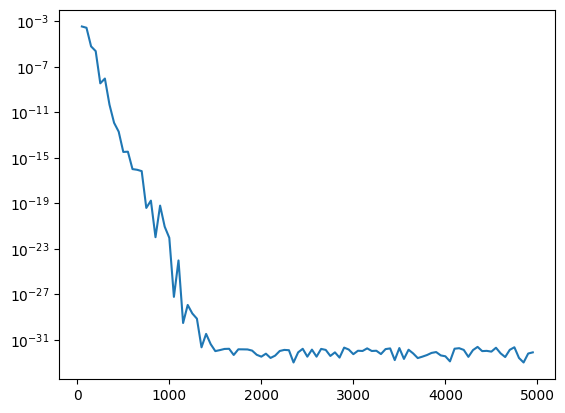

In [18]:
plt.semilogy(t_array, var_array)